# Normal Mode Analysis (NMA)
### University of California, Berkeley - Spring 2024

The goal of today’s lecture is to present Normal Mode Analysis (NMA) simulations of macromolecules and how to run them using Python programmming language. In this lecture, `ProDy` package is used for performing simulations and visualzations. 

The following concepts are covered in this notebooks:

* __Introduction__
* __ProDy__
* __GNM example with ProDy__

## Introduction
A normal mode of an oscillating system is a pattern of motion in which all parts of the system move sinusoidally with the same frequency and with a fixed phase relation. The free motion described by the normal modes takes place at fixed frequencies. These fixed frequencies of the normal modes of a system are known as its natural frequencies or resonant frequencies. A physical object, such as a building, bridge, or molecule, has a set of normal modes and their natural frequencies that depend on its structure, materials and boundary conditions. In music, normal modes of vibrating instruments (strings, air pipes, drums, etc.) are called "harmonics" or "overtones".

The most general motion of a system is a superposition of its normal modes. The modes are normal in the sense that they can move independently, that is to say that an excitation of one mode will never cause motion of a different mode. In mathematical terms, normal modes are orthogonal to each other.

## [ProDy](http://prody.csb.pitt.edu/)

### Introduction

ProDy is a free and open-source Python package for protein structural dynamics analysis. It is designed as a flexible and responsive API suitable for interactive usage and application development.

### Structure analysis
ProDy has fast and flexible PDB and DCD file parsers, and powerful and customizable atom selections for contact identification, structure comparisons, and rapid implementation of new methods.

### Dynamics analysis
In this lecture, we are going to use ProDy for Normal Mode Analysis (NMA) which can be performed using 

* Anisotropic network model (ANM)
* Gaussian network model (GNM)
* ANM/GNM with distance and property dependent force constants

Here, we will use Ubiquitin to perform Gaussian network model a.k.a. GNM.

It's worth mentioning that dynamics from experimental datasets, theoretical models and simulations can be visualized using [NMWiz](http://prody.csb.pitt.edu/nmwiz/). Normal Mode Wizard (NMWiz) is a VMD plugin designed for visual comparative analysis of normal mode data, i.e. modes may come from principal component, essential dynamics, normal mode analysis or may be any vector describing a molecular motion.


### Installation
You can install `ProDy` package using the following commands in your terminal:


1. Installing to your base Python installation:
```bash
pip install prody matplotlib
```

1. Installing using Conda (Recommended):
```bash
conda create -n nma
conda activate nma
conda install ipykernel matplotlib conda-forge::prody
```  
2. If using jupyter lab   
```bash
python -m ipykernel install --user --name=nma
```
3. Make sure to activate your environment as a kernel in your notebook (top right)


### Getting Started
Ok great! Now let's start using `ProDy` :)
To start using ProDy and turn this notebook's interactive mode on, Please run the following cell. This will import everything from ProDy package and enables the interactive mode.

In [40]:
from prody import *
from pylab import *

ion() # turns interactive mode on

## Gaussian Network Model (GNM) Analysis with ProDy

This example shows how to perform GNM calculations using an X-ray structure of `ubiquitin`. `Ubiquitin` is a small, 76-amino acid, regulatory protein that was discovered in 1975. It's present in all eukaryotic cells, directing the movement of important proteins in the cell, participating in both the synthesis of new proteins and the destruction of defective proteins.

A GNM instance that stores the Kirchhoff matrix and normal mode data describing the intrinsic dynamics of the protein structure will be obtained. GNM instances and individual normal modes (Mode) can be used as input to functions in ```prody.dynamics``` module.

We'll go through the analysis step by step. 

### 1. Parsing PDB file
Ok, let's parse the protein's PDB structure file with `ProDy`. This can be done using `parsePDB()` function from `ProDy`. The function will accept an identifier as the PDB ID. If the PDB file with the given ID exists in the local directory, it will load the file locally. Otherwise, the PDB file will be downloaded automatically.

![Ubiquitin 3D structure](https://proteopedia.org/wiki/images/c/c4/Lysubq.png)

Reference: https://proteopedia.org/wiki/index.php/Image:Lysubq.png

In [41]:
ubiquitin = parsePDB('1aar')

@> Connecting wwPDB FTP server RCSB PDB (USA).


@> 1aar downloaded (c:\Users\Ali\...\1aar.pdb.gz)
@> PDB download via FTP completed (1 downloaded, 0 failed).
@> 1218 atoms and 1 coordinate set(s) were parsed in 0.01s.


In [42]:
ubiquitin

<AtomGroup: 1aar (1218 atoms)>

This file contains 2 chains, and a flexible C-terminal (residues 71-76). We only want to use Cα atoms of first 70 residues from chain A, so we select them:

In [43]:
c_alphas = ubiquitin.select('calpha and chain A and resnum < 71')

In [44]:
c_alphas

<Selection: 'calpha and chai...and resnum < 71' from 1aar (70 atoms)>

A comprehensive documentation of atom selection is provided by `ProDy` in this [link](http://prody.csb.pitt.edu/manual/reference/atomic/select.html#selections). You can learn more about the selection in the mentioned webpage. 

As an example which can be useful to know here, __Cα__ is the central point in the backbone of every amino acid. The alpha carbon (α-carbon or Cα) is what connects the amino group to the acid carboxyl group, giving amino acids their name. The alpha carbon also serves as the point of attachment for the sidechains of 19 out of 20 amino acids used in protein building.

![](https://static.wikia.nocookie.net/foldit/images/e/ea/Backbone_overview_group.stickpolarh.png/revision/latest?cb=20180103000343)

Figure Reference: https://static.wikia.nocookie.net/foldit/images/e/ea/Backbone_overview_group.stickpolarh.png/revision/latest?cb=20180103000343

### Build Kirchhoff Matrix
First, Let's create a `GNM` object. 

In [45]:
gnm = GNM(name='Ubiquitin')

In [46]:
gnm

<GNM: Ubiquitin (0 modes; 0 nodes)>

We can build Kirchhoff matrix using selected atoms and `gnm.buildKirchhoff()` method. The method accepts the coordinates as the first arguments. It also accepts two additonal parameters named `cutoff` as the cutoff distance for pairwise interactions and `gamma` as spring constant. You can leave the parameters with their default values and move on. 

In [47]:
gnm.buildKirchhoff(coords=c_alphas, cutoff=10.0, gamma=1.0)

@> Kirchhoff was built in 0.00s.


Now the Kirchhoff matrix is built, we can get a copy of it using `gnm.getKirchhoff()` method.

In [48]:
k_matrix = gnm.getKirchhoff()

In [49]:
k_matrix

array([[11., -1., -1., ...,  0.,  0.,  0.],
       [-1., 15., -1., ...,  0.,  0.,  0.],
       [-1., -1., 20., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ..., 20., -1., -1.],
       [ 0.,  0.,  0., ..., -1., 21., -1.],
       [ 0.,  0.,  0., ..., -1., -1., 12.]])

__NOTE__: If you have already calculated the Kirchhoff matrix and want to set it manually, you can use `gnm.setKirchhoff()` method.

### It's time to calculate the normal modes! :)
Now that we have the Kirchhoff matrix, Calculating the normal modes can be done simply by using `gnm.calcModes()` method.

Note that by default 20 non-zero (or non-trivial) modes and 1 trivial mode are calculated. Trivial modes are not retained. To calculate different numbers of non-zero modes or to keep zero modes, you can modify `n_modes` and `zeros` parameters of the function e.g. try `gnm.calcModes(50, zeros=True)`. You can set `Turbo` parameter tu `True` if you want to calculate the modes faster. It's also set by default to `True`.

In [50]:
gnm.calcModes(n_modes=20, zeros=False, turbo=True)

@> 20 modes were calculated in 0.00s.


Ok. The modes are ready. You can get the results the following functions: 

* `gnm.getEigvals()`: Get Eigenvalues
* `gnm.getEigvecs()`: Get Eigenvectors
* `gnm.getCovariance()`: Get Covariance matrix. Note that covariance matrices are calculated using the available modes in the model, which is the slowest 20 modes in this case. If the user calculates `M` modes, these `M` modes will be used in calculating the covariance matrix.

In [51]:
gnm.getEigvals()

array([ 2.50159996,  2.81198884,  4.36615755,  5.04996398,  7.18368407,
        7.64988589,  7.87722993,  9.08034538,  9.71281297, 10.13238988,
       10.50197833, 10.64403971, 10.88838721, 11.15731079, 11.2850227 ,
       11.63219978, 11.7801197 , 11.93585376, 12.00584891, 12.2183852 ])

In [52]:
gnm.getEigvals().shape

(20,)

In [53]:
gnm.getEigvecs()

array([[-6.38051740e-02, -1.30544492e-01, -2.45334248e-01, ...,
        -2.56196713e-01,  5.37771418e-01, -1.08369816e-04],
       [-7.25770215e-02, -8.45109261e-02, -1.90052460e-01, ...,
         6.24201652e-03, -6.93922518e-02,  3.22234776e-02],
       [-7.58827175e-02, -4.30040725e-02, -1.34783179e-01, ...,
         1.66397155e-02, -4.70341843e-02,  1.77800008e-02],
       ...,
       [-9.21438212e-02,  6.36544251e-02,  1.04633107e-01, ...,
         3.21057282e-02, -4.19619569e-02,  6.20810516e-03],
       [-7.00439044e-02,  9.90390676e-02,  5.42931923e-02, ...,
         3.08618840e-02,  2.37876216e-02, -1.36026733e-02],
       [-8.08918894e-02,  1.34634053e-01,  1.24148042e-01, ...,
         1.25198059e-02, -3.99479375e-02, -1.84106396e-02]])

In [54]:
gnm.getEigvecs().shape

(70, 20)

In [55]:
gnm.getCovariance()

array([[ 0.08038538,  0.0214721 ,  0.01154276, ..., -0.00810262,
        -0.0068922 , -0.00519627],
       [ 0.0214721 ,  0.01841361,  0.01294682, ..., -0.00164253,
        -0.0030955 , -0.00590236],
       [ 0.01154276,  0.01294682,  0.01015144, ...,  0.00079905,
        -0.00034443, -0.00350823],
       ...,
       [-0.00810262, -0.00164253,  0.00079905, ...,  0.01120008,
         0.00810447,  0.01423867],
       [-0.0068922 , -0.0030955 , -0.00034443, ...,  0.00810447,
         0.00920142,  0.01602405],
       [-0.00519627, -0.00590236, -0.00350823, ...,  0.01423867,
         0.01602405,  0.05269755]])

In [56]:
gnm.getCovariance().shape

(70, 70)

In order to access to each single mode, you can index `gnm` object. Normal mode indices start from 0, so slowest mode has index 0.

In [57]:
slowest_mode = gnm[0]

In [58]:
slowest_mode.getEigval()

2.5015999599631495

In [59]:
slowest_mode.getEigvec()

array([-0.06380517, -0.07257702, -0.07588272, -0.11243047, -0.09221726,
       -0.14296277, -0.16396628, -0.2053729 , -0.24020989, -0.3134546 ,
       -0.19166723, -0.15241052, -0.0657869 , -0.07000933, -0.0253338 ,
       -0.03129034,  0.0007266 , -0.0058239 , -0.01543903,  0.02655975,
        0.04238382,  0.05465168,  0.06268858,  0.08997896,  0.08987359,
        0.06877047,  0.13222327,  0.1748625 ,  0.14497343,  0.12132971,
        0.19509205,  0.21771503,  0.15807374,  0.21746306,  0.24530097,
        0.21361762,  0.22544686,  0.1707908 ,  0.1998145 ,  0.15089032,
        0.10228462,  0.04310205, -0.028911  , -0.06447926, -0.0721635 ,
       -0.08602533, -0.09012947, -0.07761776, -0.05653068, -0.01097932,
        0.0162001 ,  0.06091741,  0.05773185,  0.04274781,  0.02903195,
        0.01313377,  0.00376044,  0.01133737, -0.01299074, -0.03725209,
       -0.05023782, -0.05862394, -0.07037726, -0.0936061 , -0.09401438,
       -0.09896954, -0.09684669, -0.09214382, -0.0700439 , -0.08

### Hinge sites
Hinge sites identified from all calculated modes. You can identify them using the global `calcHinges()` function. This function accepts `gnm` object as the first argument.

In [60]:
hinges = calcHinges(modes=gnm)

In [61]:
len(hinges)

64

In [62]:
hinges[:20]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 13, 14, 16, 17, 18, 19, 20, 21]

### Short question! Calculate the hinges of the slowest mode

In [63]:
### YOUR CODE GOES HERE
slowest_hinge = calcHinges(modes=slowest_mode)
slowest_hinge

[16, 18, 42, 49, 57]

These numbers correspond to node indices in the `gnm` object, which does not know anything about the original atoms. In order to get the residue numbers corresponding to these hinges, we can index the resum array with the hinges list as follows:

In [64]:
# 1. get a copy of residue numbers
resnums = c_alphas.getResnums() 

In [65]:
# 2. calculate hinge site of the mode of interest (here we used the 2nd mode)
mode2_hinges = calcHinges(gnm[1])

In [66]:
# 3. get residue numbers corresponding these hinges
resnums[mode2_hinges]

array([ 4, 15, 26, 44, 47, 48, 49, 66])

### Visualization!
All of the `ProDy` visualization functions are prefixed with __`show...()`__. Let’s use some of them to plot data:

#### Contact Map

@> WARNING matplotlib 3.6 and later are not compatible with interactive matrices
@> WARNING matplotlib 3.6 and later are not compatible with interactive matrices


(<matplotlib.image.AxesImage at 0x14cf8c44c50>,
 [],
 [])

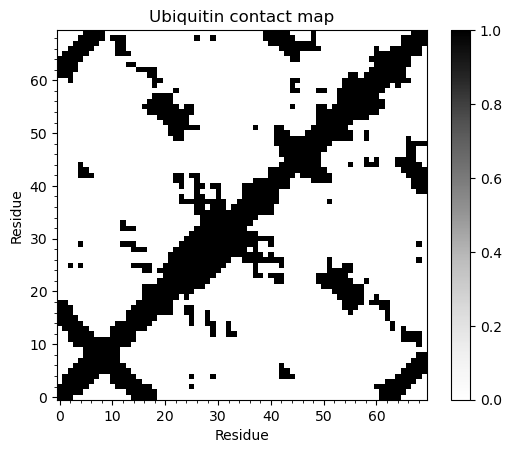

In [67]:
showContactMap(gnm)

#### Cross Correlations

@> WARNING matplotlib 3.6 and later are not compatible with interactive matrices
@> WARNING matplotlib 3.6 and later are not compatible with interactive matrices


(<matplotlib.image.AxesImage at 0x14cf8d4ad10>,
 [],
 [])

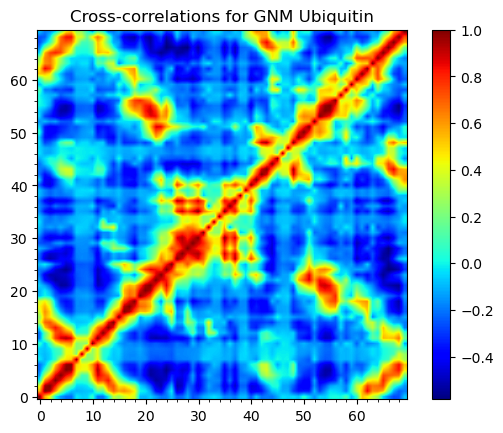

In [68]:
showCrossCorr(gnm)

#### Slow mode shape
By default, hinge sites will be shown in `mode shape plot` indicated by __red__ stars, and it can be turned off by setting `hinges=False`. The option `zero=True` is to turn on the reference line of zero.

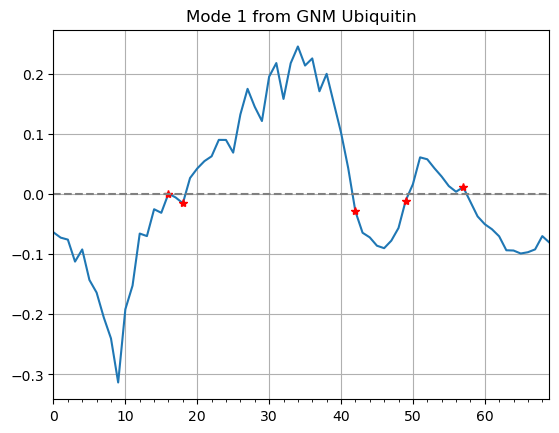

In [69]:
showMode(slowest_mode, hinges=True, zero=True)
grid()

#### Square fluctuations

[([<matplotlib.lines.Line2D at 0x14cf90b7510>], [], [], [])]

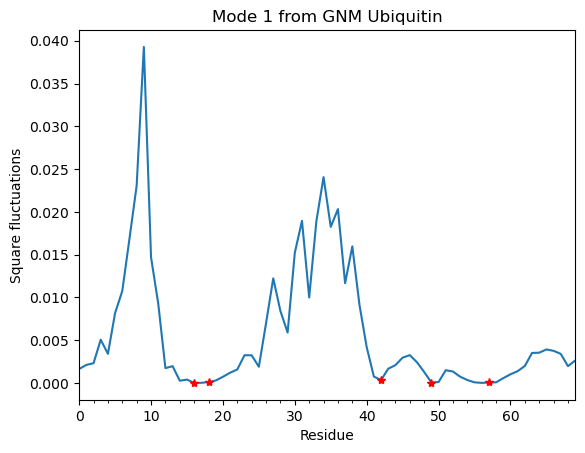

In [70]:
showSqFlucts(slowest_mode, hinges=True)

#### Protein structure bipartition
Given a GNM mode, protein structure can be partitioned into two parts that move with respect to each other. The function `showProtein()` can take a __GNM mode__ as input and visualize the bipartition.

<Axes3D: xlabel='x', ylabel='y', zlabel='z'>

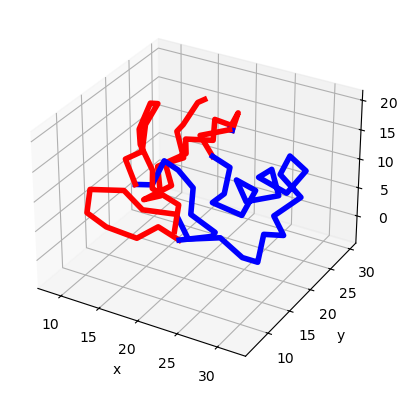

In [71]:
showProtein(c_alphas, mode=gnm[0])

## Deliverable
Explore protein data bank and find a protein .pdb of your choice and perform normal mode analysis on the protein. For ease, duplicate the notebook under a different name. Using this new .pdb, run all the cells as before and generate new plots. Analyze your results in a write-up of minimum 250 words not including figure names or descriptions. Use your plots to support your analysis using figure numbers and detailed descriptions. Submit as a .pdf to bCourses.  

Adapted from: https://github.com/Naghipourfar/molecular-biomechanics/